In [2]:
import numpy as np
import sklearn as sk
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the embeddings
train_data = np.load('_gitignore/train_data_wv2_30_5.npz', allow_pickle=True)
test_data = np.load('_gitignore/test_data_w2v_30_5.npz', allow_pickle=True)

# Split the data into X and Y
X_train = train_data['x']
Y_train = train_data['y']
X_test = test_data['x']
Y_test = test_data['y']

# Load the models
rand_forest = joblib.load('trained/rand_forest_model_mdNone_mss2_ne200.gz')
svr= joblib.load('trained/svr_rbf_c01.gz')
mlp= joblib.load('trained/MLP.gz')

# Predict on the data
Y_pred_rf = rand_forest.predict(X_test)
Y_pred_svr = svr.predict(X_test)
Y_pred_mlp = mlp.predict(X_test)

def rmse(Y_test, Y_pred):
    return np.sqrt(sk.metrics.mean_squared_error(Y_test, Y_pred))

In [17]:
# Print different statistics

print('Model','MSE\t\t', 'RMSE\t\t\t', 'R2')
print('RF ',mean_squared_error(Y_test, Y_pred_rf), rmse(Y_test, Y_pred_rf), r2_score(Y_test, Y_pred_rf))
print('SVR',mean_squared_error(Y_test, Y_pred_svr), rmse(Y_test, Y_pred_svr), r2_score(Y_test, Y_pred_svr))
print('MLP',mean_squared_error(Y_test, Y_pred_mlp), rmse(Y_test, Y_pred_mlp), r2_score(Y_test, Y_pred_mlp))

Model MSE		 RMSE			 R2
RF  0.02587508853631114 0.16085735462300485 0.2531769186466868
SVR 0.027874512640404445 0.16695661903741477 0.1954682824711782
MLP 0.028207937449183495 0.16795218798569875 0.1858447659084207


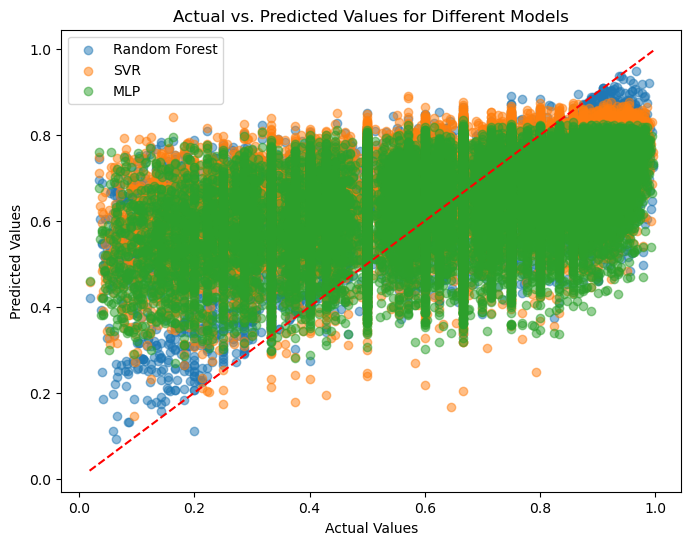

In [10]:
# Create a scatter plot for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_rf, label='Random Forest', alpha=0.5)

# Create a scatter plot for SVR
plt.scatter(Y_test, Y_pred_svr, label='SVR', alpha=0.5)

# Create a scatter plot for MLP
plt.scatter(Y_test, Y_pred_mlp, label='MLP', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Different Models')

# Add a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')


# Add a legend
plt.legend()

# Show the plot
plt.show()

## Conclusion

As we can see from the graph and the metrics used, the Random Forest model outperforms the other models in terms of Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). The Random Forest model achieved the lowest MSE of approximately 0.026 and RMSE of approximately 0.161, indicating that its predictions are, on average, the closest to the actual values. This suggests that Random Forest has the best overall predictive performance among the three models.